Epoch 1/50


/opt/anaconda3/envs/stock/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.3888 - val_loss: 0.2265
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1355 - val_loss: 0.0168
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 - val_loss: 0.0076
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0090 - val_loss: 0.0047
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 7/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 9/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 9.6862e-04
Epoch 10/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 11/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2898e-04 - val_loss: 0.0010
Epoch 12/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/var/folders/xf/vnxljjm16fq_d754ny3ptr0h0000gn/T/ipykernel_2891/4279019081.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


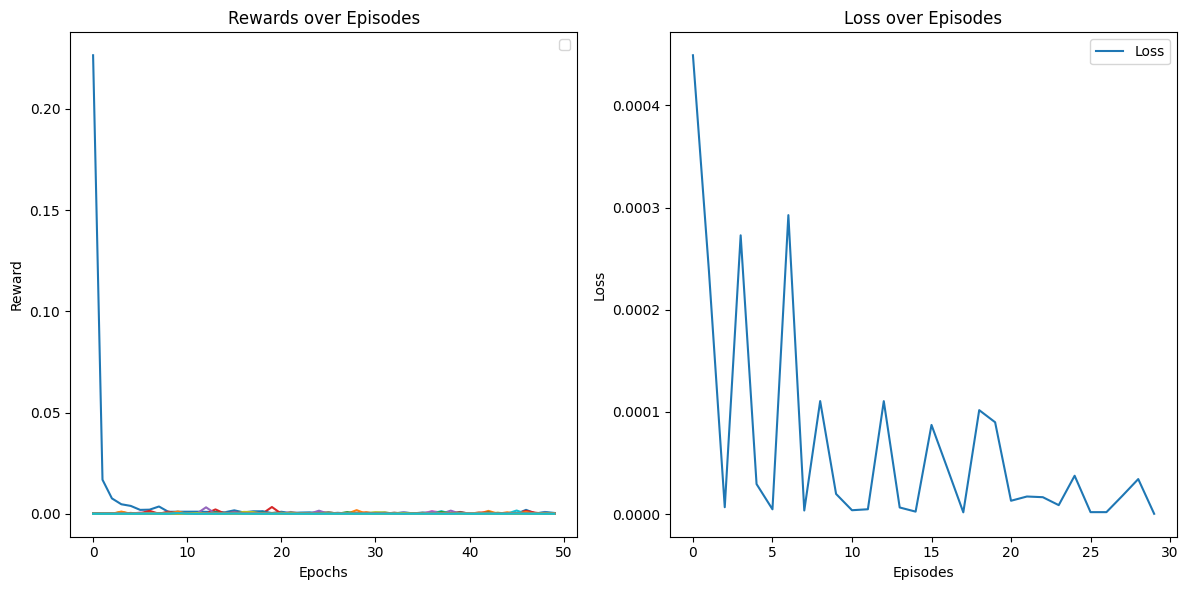

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Điểm dự đoán năm nay: [[6.4497337 7.229448  5.5101314]]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

data = pd.read_csv('diemthi2024.csv')

data = data.fillna(0) 
X = data[['Toan', 'NguVan', 'NgoaiNgu']]
y = data.drop(columns=['sbd', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'ma_ngoai_ngu'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

class DQNAgent:
    def __init__(self, model):
        self.model = model
        self.history = None 

    def train(self, X_train, y_train, epochs, batch_size):
        self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def predict(self, X):
        return self.model.predict(X)

episodes = 10
batch_sizes = [16, 32, 64]
best_loss = float('inf')
best_params = {}
all_rewards = [] 
all_losses = [] 

for episode in range(episodes):
    for batch_size in batch_sizes:
        agent = DQNAgent(model)
        agent.train(X_train, y_train, epochs=50, batch_size=batch_size)
        
        loss = agent.evaluate(X_test, y_test)
        
        if loss < best_loss:
            best_loss = loss
            best_params = {'episode': episode+1, 'batch_size': batch_size}
        
        all_rewards.append(agent.history.history['val_loss'])
        all_losses.append(loss)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i, rewards in enumerate(all_rewards):
    plt.plot(rewards)
plt.title('Rewards over Episodes')
plt.xlabel('Epochs')
plt.ylabel('Reward')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(all_losses, label='Loss')
plt.title('Loss over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('reward-loss.png')
plt.show()

# Predict scores based on average scores of the previous year using the best model
average_scores = np.array([[6.45, 7.23, 5.51]])
average_scores_df = pd.DataFrame(average_scores, columns=['Toan', 'NguVan', 'NgoaiNgu']) 
average_scores_scaled = scaler.transform(average_scores_df)
predicted_scores = agent.predict(average_scores_scaled)
print(f'Điểm dự đoán năm nay: {predicted_scores}')